### Implementation of Perceptron Algorithm

This algorithm has been implemented in the file Perceptron.py

```
from Perceptron import Perceptron
```

Here is a link to the Perceptron class:

https://github.com/MGyawu/MGyawu.github.io/blob/main/posts/Perceptron/Perceptron.py

Within the Perceptron Class there are 3 functions. 

```
Perceptron.fit(X,y)   #updates perceptron and initializes vector Perceptron.w and Perceptron.history
Perceptron.predict(X) #predicts labels based on feature matrix
Perceptron.score(X,y) #determines accuracy of predicted labels
```

Perceptron.fit(X,y) is where the perceptron algorithm is implemented which proceeds as follows:

1. Initialize a random initial weight vector 
2. Then, until termination:
* Pick a random index i
* Compute: $w^{t+1}$ = $w^{t}$ + 1(y~i~ <$w^{t}$,x~i~>  < 0)y~i~x~i~

### Plotting A Set of Points

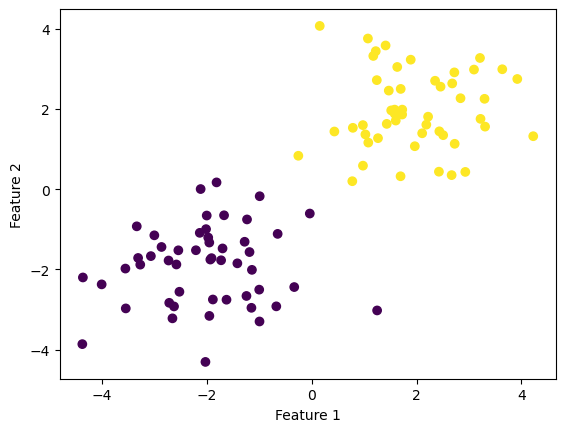

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from Perceptron import Perceptron

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 2

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-2, -2), (2, 2)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Experiments
#
#### Experiment 1

Data is linearly separable then the perceptron algorithm converges to weight vector w
describing a separating line. As more predicted labels created by Perceptron matches
the actual labels, then the accuracy score given to the labels increases, and reaches
a score of 1 (100%) when the predicted labels completely match the actual labels.
Using my implementation of Perceptron, here is how the algorithm works on linearly
separable data.

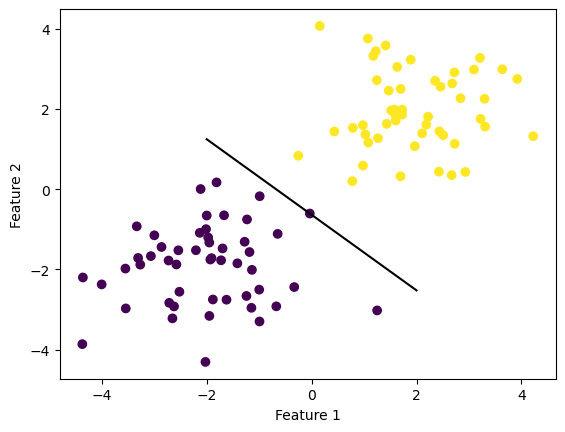

In [19]:
P = Perceptron()
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
P.fit(X_,y)
#print("History of Accuracy \n" + str(P.history))

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

#fig = plt.plot(P.history)
#xlab = plt.xlabel("Iteration")
#ylab = plt.ylabel("Accuracy")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(P.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

##### Change In Accuracy Score

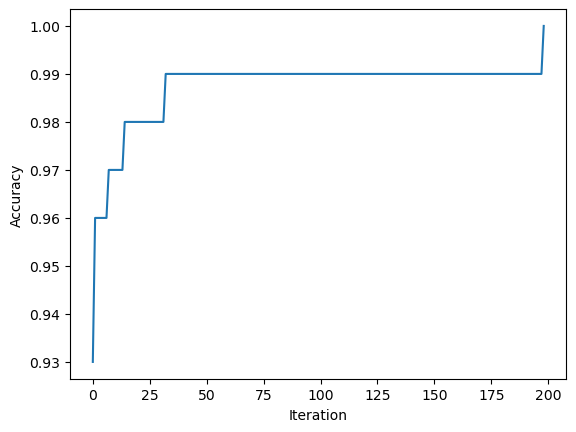

In [20]:
fig = plt.plot(P.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")


#### Experiment 2

For 2d data, when the data is not linearly separable, the perceptron algorithm will not settle on a final value of w, 
but will instead run until the maximum number of iterations is reached, without achieving perfect accuracy.Here is 
how the perceptron algorithm would function on data that is not linearly separable.

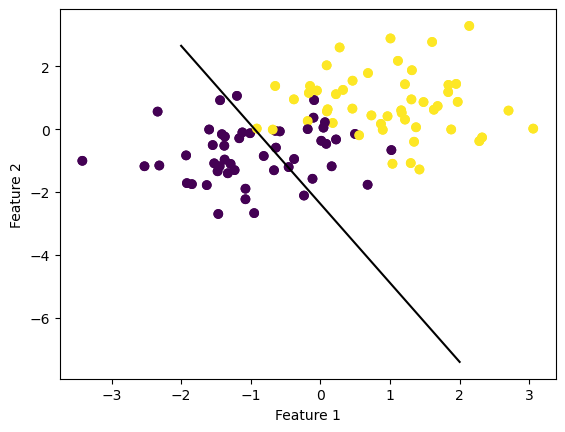

In [21]:
n = 100
p_features = 2

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

P_2 = Perceptron()
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
P_2.fit(X_,y)
#print("History of Accuracy \n" + str(P_2.history))

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(P_2.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

##### Change In Accuracy Score

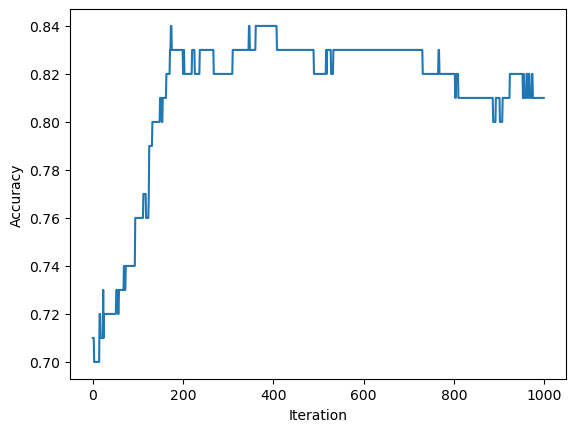

In [22]:
fig = plt.plot(P_2.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")


#### Experiment 3

Because the perceptron algorithm is not limited to 2 dimensions, I decided to run the perceptron algorithm on a data 
set with 10 features, judge the accuracy, and based on that determine if the data is linearly separable.

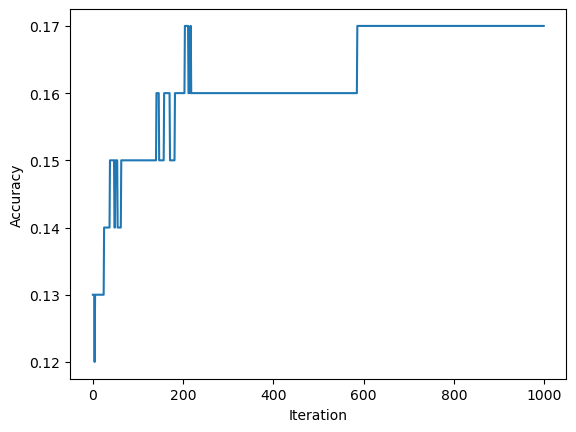

In [23]:

n = 100
p_features = 10

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

P_3 = Perceptron()
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
P_3.fit(X_,y)
#print("History of Accuracy \n" + str(P_3.history))
fig = plt.plot(P_3.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Given the fact that the accuracy never reaches a score of 1.0, this data must not be linearly separable.

### Runtime Complexity

Updating the Perceptron algorithm is dependent on this equation:

$w^{t+1}$ = $w^{t}$ + 1(y~i~ <$w^{t}$,x~i~>  < 0)y~i~x~i~

Calculating <$w^{t}$,x~i~> requires you to find the dot product of w(vector of weights) and x(the feature matrix).
As a result we have a runtime of O(wx).